## Analisis de Datos

## Regresión logística

## Javier Alejandro Segura Rodríguez

## Sergio Andres Aponte Suarez

## Daniel Enrique Cantor Verano

## Richard Sneider Mendivelso Romero

## Codigo Curso 202016908_78

In [12]:
#Cargar Librerias
#Importamos las librerias
#Se usar para crear objeto DataFrame
import pandas as pd
#Se usa para usar funciones matematicas
import numpy as np
#se usa para visualización de gráficas con mejor visualización
import seaborn as sns
#se usa para visualización de gráficas
import matplotlib.pyplot as plt
#Se usa para la generación de algoritmo de aprendizaje y evaluación del mismo
from sklearn import metrics
#Se usa para dividir el Dataset en dos partes Entrenamiento y Prueba
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
#Cargamos el dataset y mostramos las 5 primeras filas
data = pd.read_csv("heart_cleveland_upload.csv")
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [20]:
#obtener resumen estadistico
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


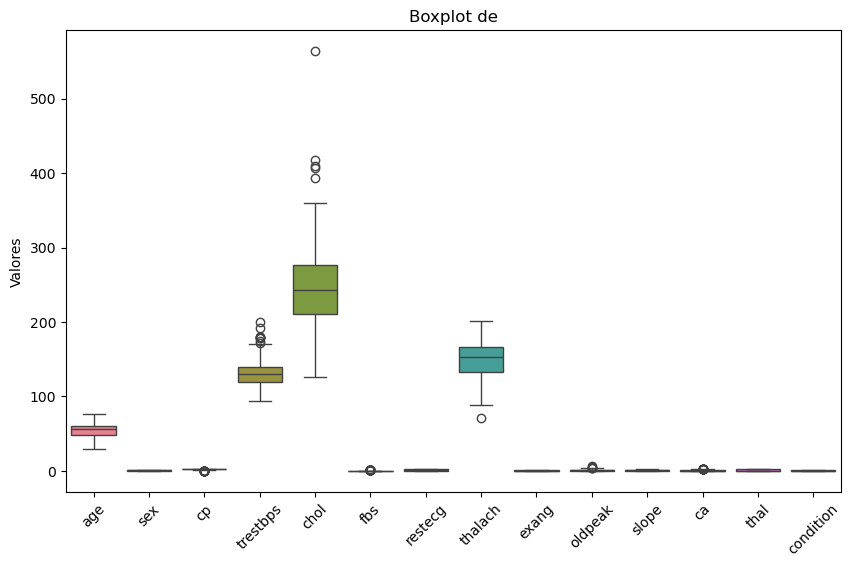

In [26]:
 plt.figure(figsize=(10,6))
sns.boxplot(data=data[["age", "sex", "cp", "trestbps", "chol", 
            "fbs", "restecg", "thalach", "exang", "oldpeak", 
            "slope", 
            "ca", 
            "thal", 
            "condition"]])
plt.xticks(rotation=45)
plt.title("Boxplot de")
plt.ylabel("Valores")
palette='tab10'
plt.show()

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [40]:
data["condition"].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

In [42]:
data[['condition']].head(40)

,condition
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,1
8,0
9,0


In [50]:
#porcentaje de datos para entrenamimento (train)=75% y prueba 25%
#se crean variables X y Y para almacenar la informacion del entranamiento

X = data.drop('condition',axis=1)#se cargan los datos de train sin los datos de la columna condition
Y = data['condition'] # Se cargan los datos de train con los datos de la columna condition

#La funcion train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.25 ,stratify = Y, random_state = 0)

In [52]:
print (x_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
234   56    0   3       200   288    1        2      133      1      4.0   
82    66    0   2       146   278    0        2      152      0      0.0   
36    56    1   1       120   240    0        0      169      0      0.0   
237   56    1   3       132   184    0        2      105      1      2.1   
133   47    1   2       108   243    0        0      152      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
291   40    1   3       110   167    0        2      114      1      2.0   
195   61    0   3       130   330    0        2      169      0      0.0   
170   65    0   3       150   225    0        2      114      0      1.0   
135   46    0   2       142   177    0        2      160      1      1.4   
293   39    1   3       118   219    0        0      140      0      1.2   

     slope  ca  thal  
234      2   2     2  
82       1   1     0  
36       2   0    

In [54]:
print (y_train)

234    1
82     0
36     0
237    1
133    1
      ..
291    1
195    1
170    1
135    0
293    1
Name: condition, Length: 222, dtype: int64


In [58]:
#Construir el modelo de regresión logística

modelo_regresion = LogisticRegression(solver = "liblinear") #libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (x_train,y_train)

#crea el modelo de prediccion
prediccion = modelo_regresion.predict(x_test)# la funcion predict predice los valores a partir del conjunto de datos de validacion

In [60]:
print (prediccion)

[1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0
 1]


In [62]:
print(classification_report(y_test,prediccion))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.88      0.86      0.87        35

    accuracy                           0.88        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.88      0.88      0.88        75



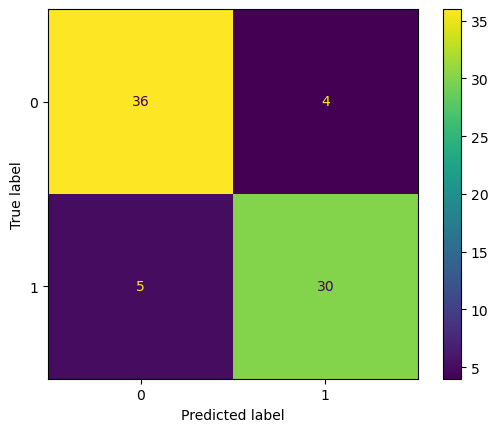

In [66]:
cm = confusion_matrix(y_test,prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()